# Using Cell Nuclei Characteristics to Diagnose Breast Cancer through Supervized Machine Learning

1. Preparing the Dataset
2. Exploratory Data Analysis
3. Data Splitting
4. Training Machine Learning Models (kNN, Naive Bayes, Log Regression, SVM)
5. Cross-Validation
6. Fine-Tuning of Hyperparameters
7. Feature Importance
8. Deployment

In this notebook, we will be aiming to classify breast cancer cells as benign or malignant using physical characteristics of their cell nuclei. The classification algorithm that will be used are supervized machine learning models, which will be deployed in a web-app.

The data is taken from: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic.


# Preparing the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
np.random.seed(100)

The dataset is inputted into a dataframe.

In [3]:
cols = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2','texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry', 'fractal_dimension']
df = pd.read_csv('wdbc.data', names = cols)
df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry,fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The categorical data that we are trying to predict, the diagnosis, is casted as integers, with the following legends:
* B (benign): 0
* M (malignant): 1

We also dropped the column ID, as they are not relevant to the analysis.

The continuous data are marked with 1, 2, or 3, indicating their data type:
* 1: mean
* 2: standard error
* 3: worst (mean of the three largest values of the features computed for the images)

In [4]:
df["Diagnosis"] = (df["Diagnosis"] == "M").astype(int)
df = df.drop("ID", axis = 1)
df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry,fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis

We then tried to graphed the characteristics to see visually whether or not the benign or malignant cells differ from each other.

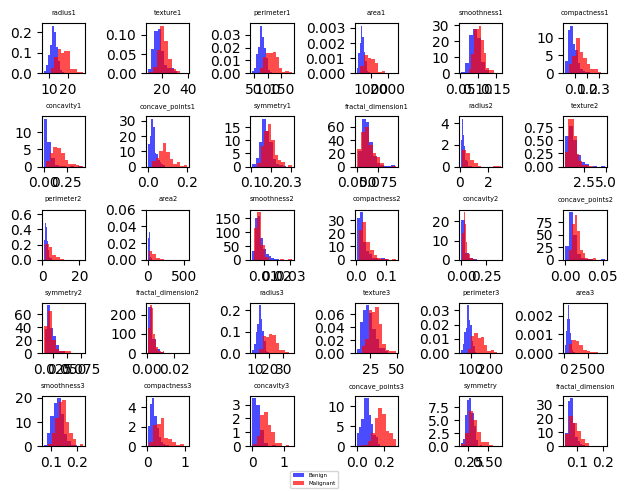

<Figure size 20000x20000 with 0 Axes>

In [5]:
figure, axis = plt.subplots(5, 6)
axis = axis.flatten()
plt.figure(figsize = (200, 200))

plt.rcParams.update({'font.size': 4})
figure.tight_layout(pad = 2.5)

for i in range(len(list(df.columns.values[1:]))):
    label = list(df.columns.values[1:])[i]
    axis[i].hist(df[df["Diagnosis"] == 0][label], color = "blue", label = "Benign", alpha = 0.7, density = True)
    axis[i].hist(df[df["Diagnosis"] == 1][label], color = "red", label = "Malignant", alpha = 0.7, density = True)
    axis[i].set_title(label)

lines_labels = [ax.get_legend_handles_labels() for ax in figure.axes][0:1]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
figure.legend(lines, labels, loc = 8)

plt.show()

As we can see, they are all important in determining whether or not a tumor cell is benign or malignant as their probability distributions are in some way, different from each other.

We also ran df.describe() to see some of the summary statistics of the data.

In [6]:
df.describe()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry,fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


To see for any outliers, we will be plotting the boxplots for each of the parameters, separated by benign or malignant.

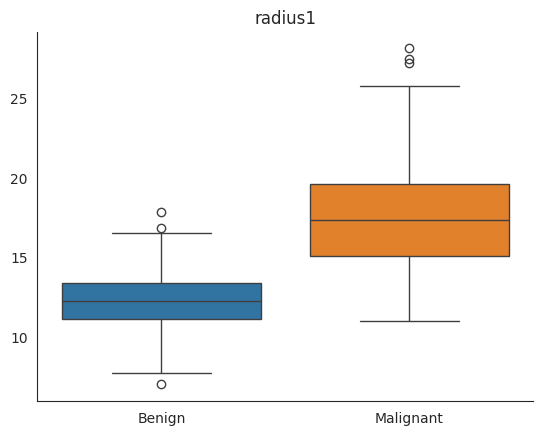

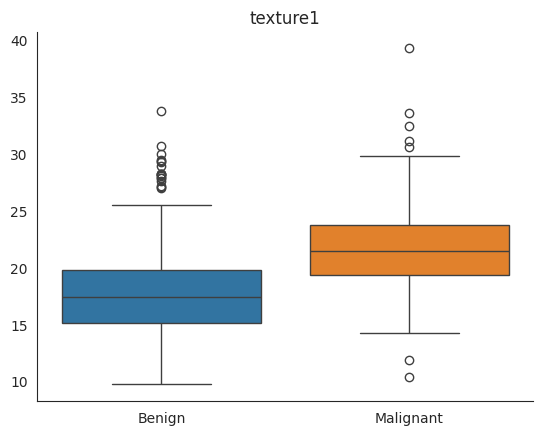

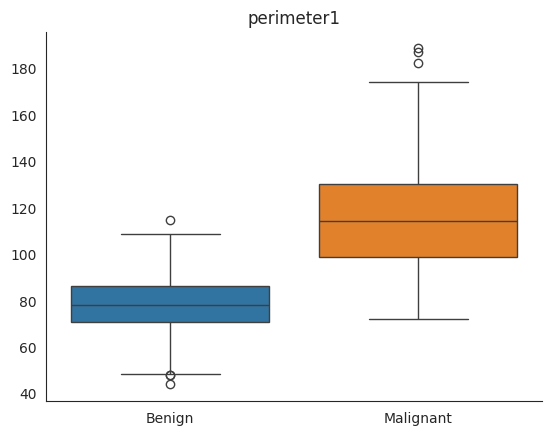

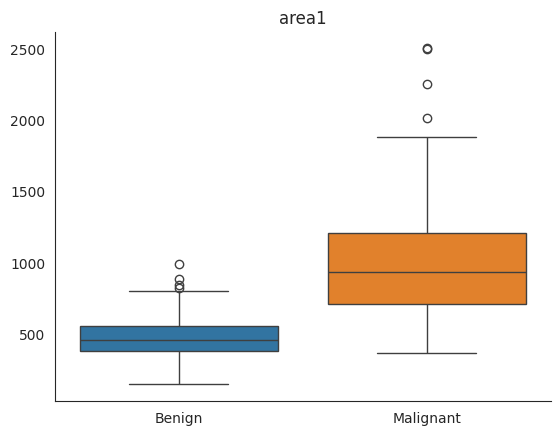

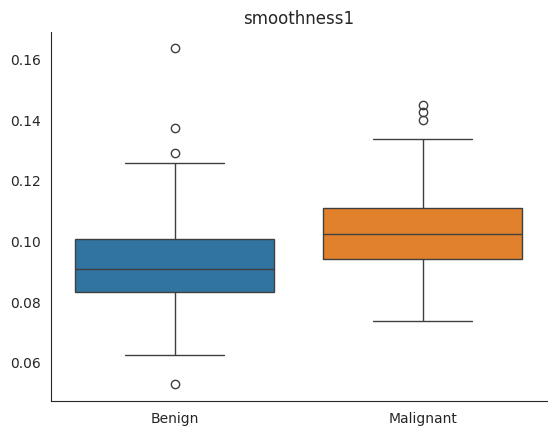

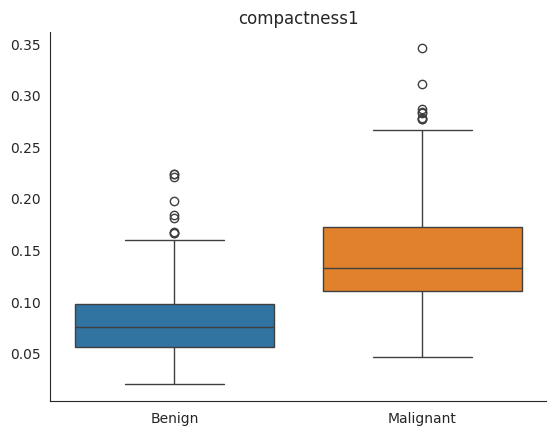

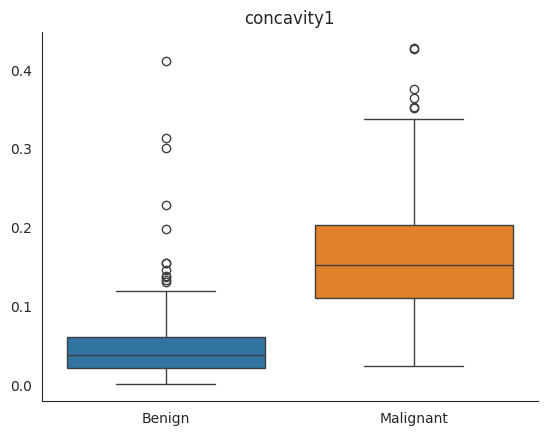

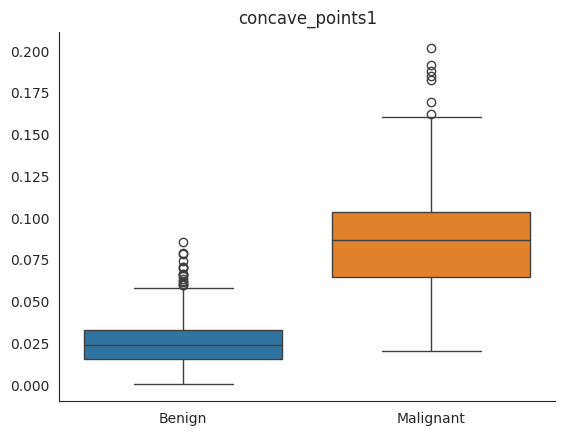

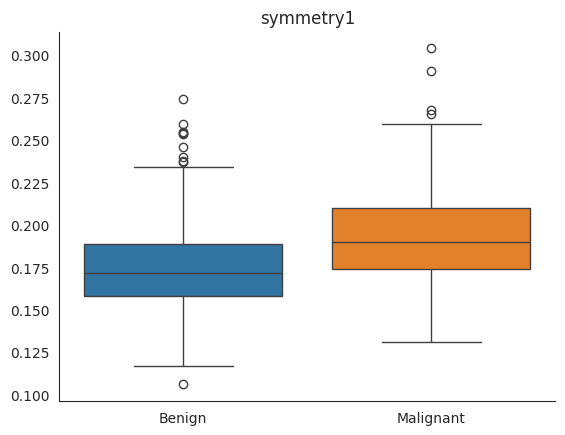

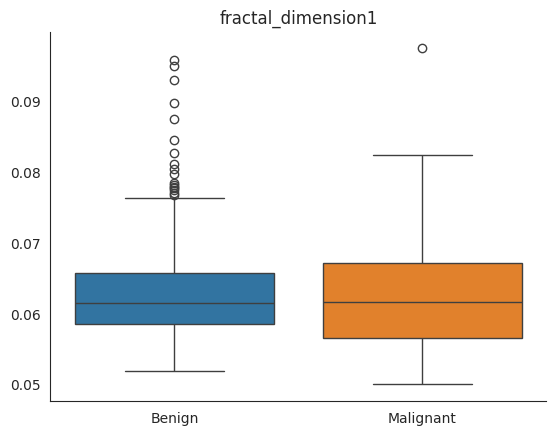

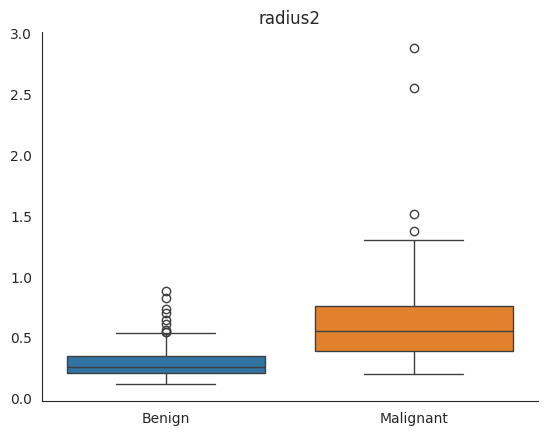

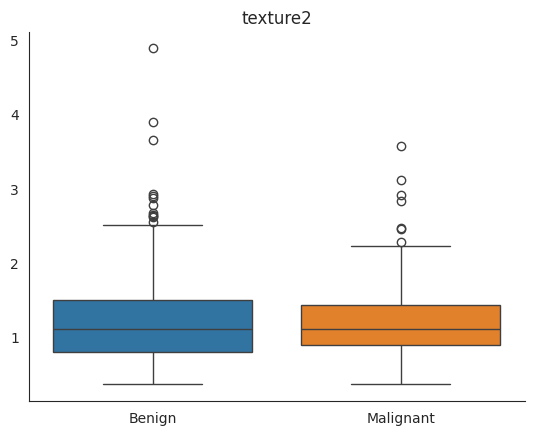

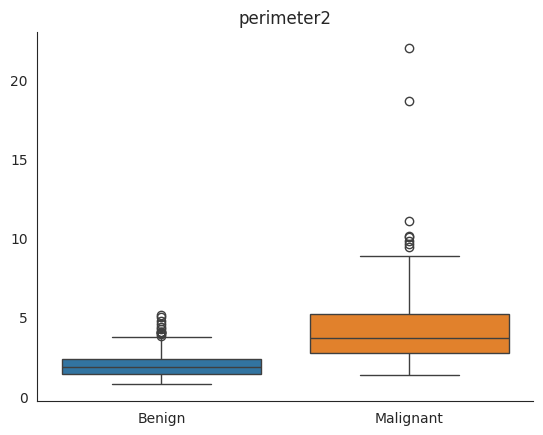

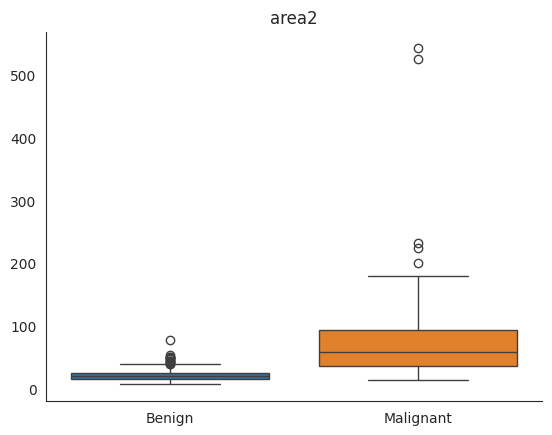

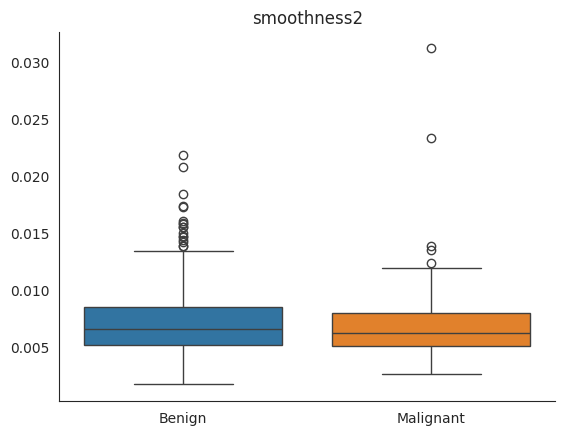

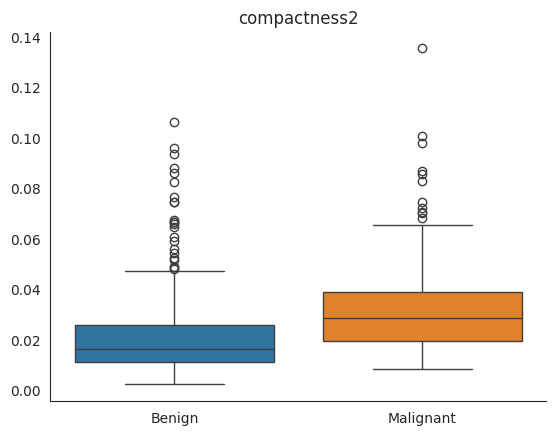

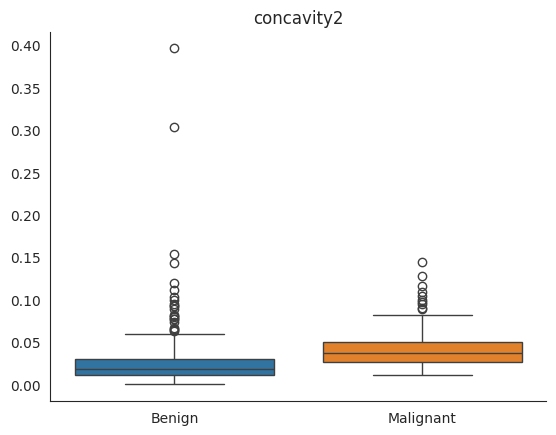

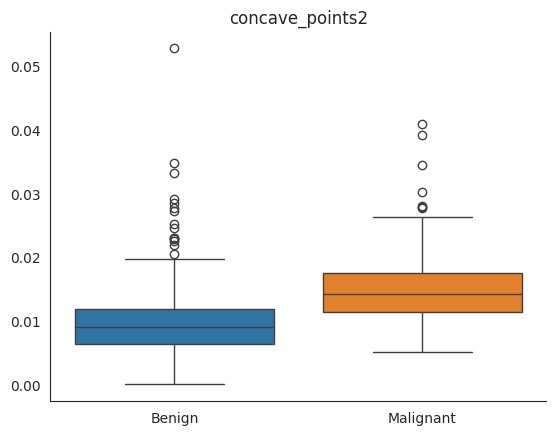

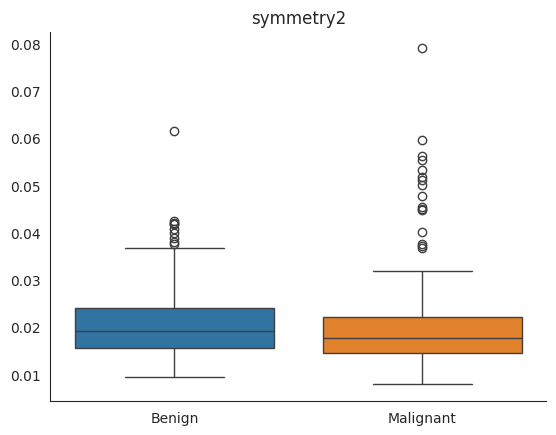

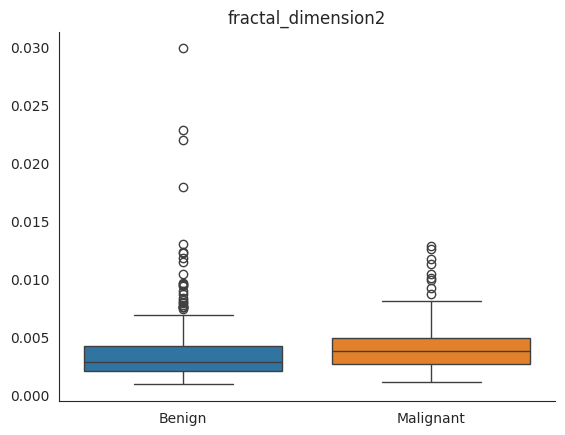

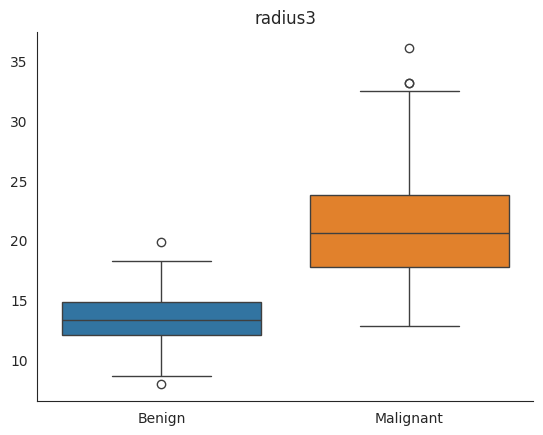

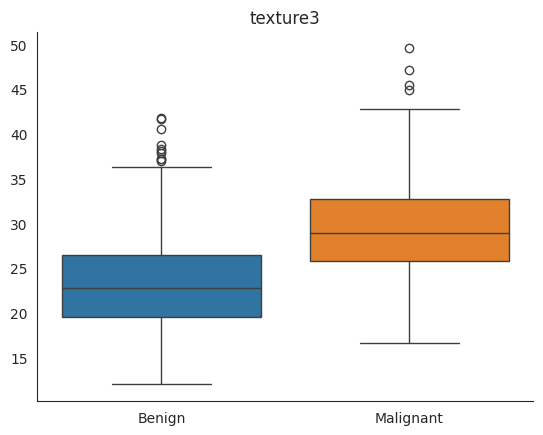

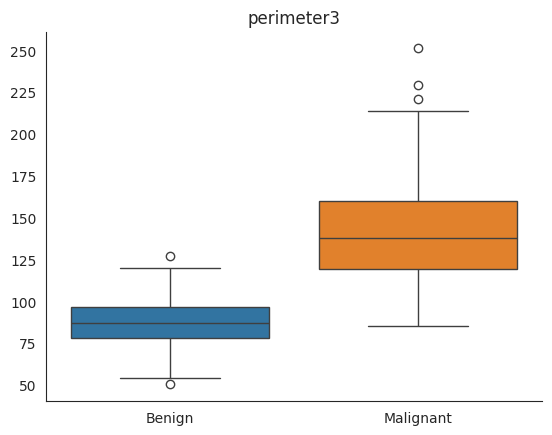

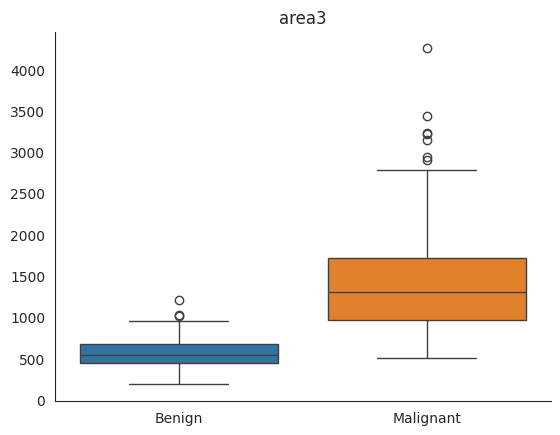

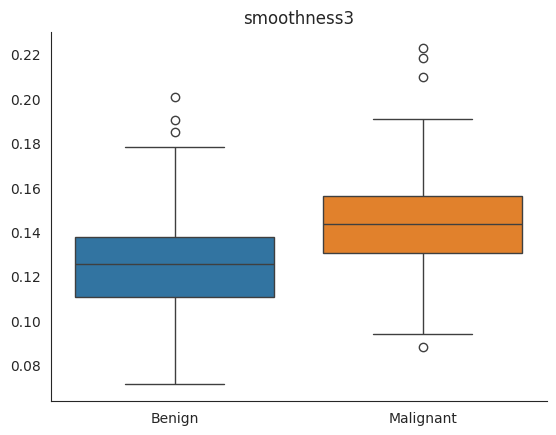

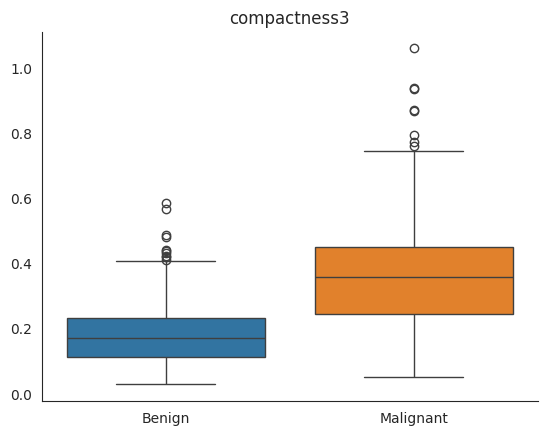

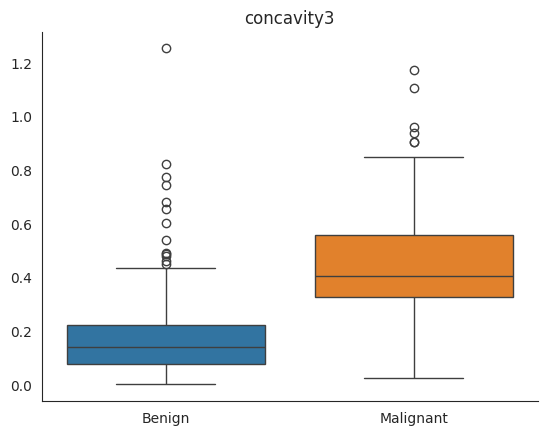

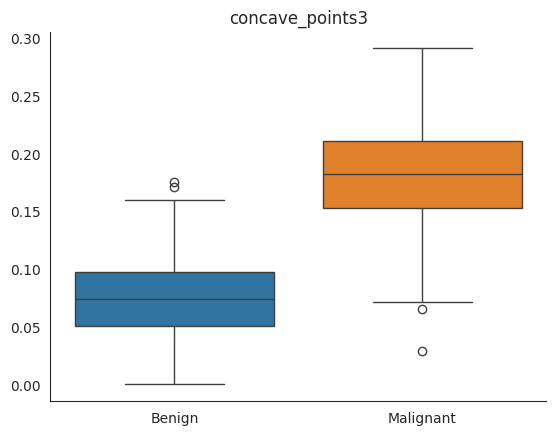

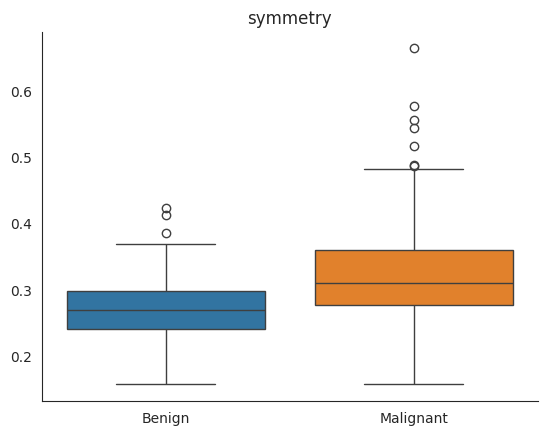

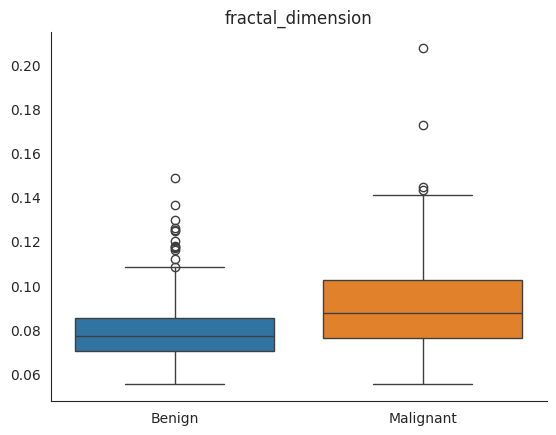

In [7]:
benign = df[df["Diagnosis"] == 0]
malignant = df[df["Diagnosis"] == 1]
plt.rcParams.update({'font.size': 10})

for i in range(len(list(df.columns.values[1:]))):
    label = list(df.columns.values[1:])[i]
    combined_dfs = pd.DataFrame({'Benign': benign[label],
                                  'Malignant': malignant[label]})
    sns.set_style('white')
    sns.boxplot(combined_dfs).set(title = label)
    sns.despine()
    plt.show()


As we can see from the boxplots, there are actually many outliers.

In order to see the correlation matrix, we run the following.

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry,fractal_dimension
Diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius1,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


# Training and Testing Data Sets

We will be splitting the datasets in an 80-20 split, with 80% of the data going into training the model while 20% going into testing the model.

Here, we define a function called *scaled dataset*, taking in the inputs *dataframe* and *oversample.* This function scales the "inputs" in order for the variables to affect the output appropriately. If the dataset oversamples one diagnoses from the other, it is recommended that the oversample parameter to be turned True as imbalances in the training dataset might cause the model to have some issues in determining a diagnosis.


In [9]:
def scale_dataset(dataframe):
  x = dataframe[dataframe.columns[1:]].values
  y = dataframe[dataframe.columns[0]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y

In [10]:
scaler = StandardScaler()
train, test = train_test_split(df, test_size = 0.2, random_state = 1, shuffle = True)
x_train = train[train.columns[1:]].values
y_train = train[train.columns[0]].values
x_test = test[test.columns[1:]].values
y_test = test[test.columns[0]].values

scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[ 0.1318529 , -1.22289689,  0.22619275, ..., -0.07497962,
        -0.09827233,  0.50779424],
       [-0.28874137, -0.15799931, -0.26406701, ...,  1.38865765,
         1.72716717,  2.06060854],
       [-0.34961686, -0.75871076, -0.3778201 , ..., -0.15264201,
         0.84251802,  0.73392057],
       ...,
       [-1.43458406, -0.46063046, -1.35313261, ...,  0.88385214,
         2.28517664,  2.03655255],
       [ 0.08757982, -0.00327061,  0.06717876, ..., -0.29691482,
        -0.70391675, -0.54164842],
       [-0.11995025, -0.81104547, -0.16833819, ..., -1.23513619,
        -1.74508076, -0.9343625 ]])

# Training Machine Learning Models and Cross-Validation

In this section, we will be training the machine learning models that have the default settings. We will be using the f1 score to decide what machine learning model we will select to fine-tune its hyperparameters. In addition, we will be cross-validating all of the machine learning models to avoid the effects of randomness.

We will be creating a dictionary for the f1-score for the positive (malignant), the metric that we will be using, to keep track of the sores and help us decide what model to choose.

In [11]:
f1_metric = {}

## k-Nearest Neighbors

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [13]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [14]:
scores  = cross_val_score(knn_model,
                         x_train,
                         y_train,
                         scoring = 'f1',
                         cv = 15)
f1_metric['knn'] = scores.mean()
print(f1_metric['knn'])

0.8637184657871158


We can see that the f1 score of k-nearest neighbors, with k = 5, has a score of 0.8637.

## Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [17]:
scores  = cross_val_score(nb_model,
                         x_train,
                         y_train,
                         scoring = 'f1',
                         cv = 15)
f1_metric['nb_model'] = scores.mean()
print(f1_metric['nb_model'])

0.9127897609636741


We can see that Naive Bayes returned an f1 score of 0.9128, which is lower than the f1 score of 5 nearest neighbors (0.8637).

## Log Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
scores  = cross_val_score(lg_model,
                         x_train,
                         y_train,
                         scoring = 'f1',
                         cv = 15)
f1_metric['lg_model'] = scores.mean()
print(f1_metric['lg_model'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9272998016476277


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [21]:
print(f1_metric['lg_model'])

0.9272998016476277


We can see that  returned an f1 score of 0.9242, which is higher than the f1 score of 5 nearest neighbors (0.9128).

## Support Vector Machines

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        72
           1       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



In [24]:
scores  = cross_val_score(svm_model,
                         x_train,
                         y_train,
                         scoring = 'f1',
                         cv = 15)
f1_metric['svm_model'] = scores.mean()
print(f1_metric['svm_model'])

0.8692541330184351


We can see that  returned an f1 score of 0.8693, which is lower than the f1 score of logistic regression (0.9242).

## Summary

Here, we will be plotting the values of f1_metric in order to compare their values to each other.

In [25]:
import math

<BarContainer object of 4 artists>

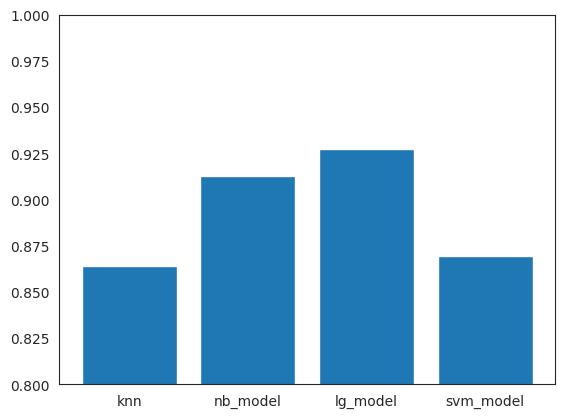

In [26]:
x = list(f1_metric.keys())
y = list(f1_metric.values())
plt.ylim(0.8, 1)
plt.bar(range(len(f1_metric)), y, tick_label = x)

We can see that logistic regression has the highest f1 score, which means that it will be the one selected for fine-tuning.

# Fine-Tuning of Parameters

We will be fine-tuning the parameters of the SVM model to best-fit the data.

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# C = 1, 2, 4, 16, 32 --> 16 --> 14, 15, 16, 17, 18 --> 12, 13, 14, 15, 16
# tol = [1e-3, 1e-4, 1e-2, 1e-1, 1e-5]

parameters = [{
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'dual': [True, False],
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'fit_intercept': [True, False]
}]

In [29]:
gridsearch_svm = GridSearchCV(lg_model,
                              param_grid = parameters,
                              scoring = 'f1',
                              cv = 10)

In [30]:
gridsearch_svm.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                          'dual': [True, False], 'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2', 'elasticnet', None]}],
             scoring='f1')

In [31]:
gridsearch_svm.best_params_

{'C': 1e-05, 'dual': False, 'fit_intercept': True, 'penalty': None}

In [32]:
gridsearch_svm.score(x_train, y_train)

0.9498525073746312

Because of this, we can say that the model is the most useful when:
* C = 1e-05
* dual = False
* fit_intercept: False
* penalty: None

# Feature Importance

Feature importance is looked into in order to determine which of the features has the most influence on the model's decision.

In [33]:
from sklearn.inspection import permutation_importance

The function below is taken from https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html#feature-importance-by-permutation.

In [34]:
def plot_feature_importances(perm_importance_result, feat_name):
    """bar plot the feature importance"""

    fig, ax = plt.subplots()

    indices = perm_importance_result["importances_mean"].argsort()
    plt.barh(
        range(len(indices)),
        perm_importance_result["importances_mean"][indices],
        xerr=perm_importance_result["importances_std"][indices],
    )

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

In [35]:
perm_importance_result_train = permutation_importance(gridsearch_svm, x_train, y_train, n_repeats = 10)

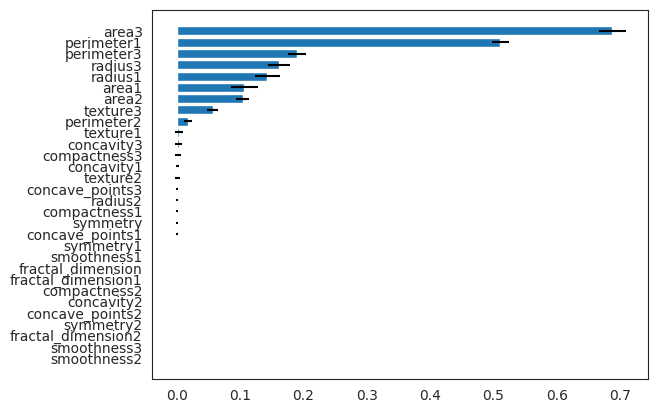

In [36]:
plot_feature_importances(perm_importance_result_train, df.columns[1:])

As we can see here, the largest measurement of area, the average perimeter, and the largest perimeter measurement are the ones that are taken into account the most in the model.

# Deployment

In order to deploy the machine learning model using Flask, we need to export it using pickle and Pipeline first.

In [46]:
import pickle
from sklearn.pipeline import Pipeline

In [47]:
sk_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', LogisticRegression(C = 1e-05, dual = False, fit_intercept = False, penalty = None))
])

In [48]:
df2 = pd.read_csv('wdbc.data', names = cols)
df2["Diagnosis"] = (df2["Diagnosis"] == "M").astype(int)
df2 = df2.drop("ID", axis = 1)
df2.head()

train2, test2 = train_test_split(df2, test_size = 0.2, random_state = 1, shuffle = True)
x_train2 = train2[train2.columns[1:]].values
y_train2 = train2[train2.columns[0]].values
x_test2 = test2[test2.columns[1:]].values
y_test2 = test2[test2.columns[0]].values

scaler.fit(x_train2)
scaler.transform(x_train2)
scaler.transform(x_test2)

array([[ 0.1318529 , -1.22289689,  0.22619275, ..., -0.07497962,
        -0.09827233,  0.50779424],
       [-0.28874137, -0.15799931, -0.26406701, ...,  1.38865765,
         1.72716717,  2.06060854],
       [-0.34961686, -0.75871076, -0.3778201 , ..., -0.15264201,
         0.84251802,  0.73392057],
       ...,
       [-1.43458406, -0.46063046, -1.35313261, ...,  0.88385214,
         2.28517664,  2.03655255],
       [ 0.08757982, -0.00327061,  0.06717876, ..., -0.29691482,
        -0.70391675, -0.54164842],
       [-0.11995025, -0.81104547, -0.16833819, ..., -1.23513619,
        -1.74508076, -0.9343625 ]])

In [49]:
sk_pipeline.fit(x_train2, y_train2).score(x_test2, y_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9736842105263158

The score of the whole pipeline is 97.37%

To export the sk_pipeline to newest_model, we execute the following code:

In [50]:
with open('newest_model.pkl', 'wb') as f:
    pickle.dump(sk_pipeline, f)